In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import nltk
import re

In [2]:
df = pd.read_csv('./train.csv', encoding ='latin1')

In [3]:
df.head()

,Item ID,Sentiment,SentimentText
0,1,0,"@RailMinIndia My PNR is 8348062961, I am in wa..."
1,2,0,@sureshpprabhu @RailMinIndia AC not working in...
2,3,0,@RailMinIndia I'm traveling to chennai by trai...
3,4,5,@RailMinIndia irctc is not responding at the t...
4,5,7,@DRMbhopal @RailMinIndia @sanjaygupta2012 @drm...


In [4]:
df.shape

(1366, 3)

In [5]:
df = df[~df['Sentiment'].isin([6, 7])]

In [6]:
df.shape

(1068, 3)

In [7]:
df['SentimentText'][232]

'@RailMinIndia @sureshpprabhu 231-9103685trn no.14854 PNR:  Charging socket of coach A1 is not working properly. Tripped several times.'

C:\Users\KHAN T C\AppData\Local\Temp\ipykernel_12512\1568713120.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')


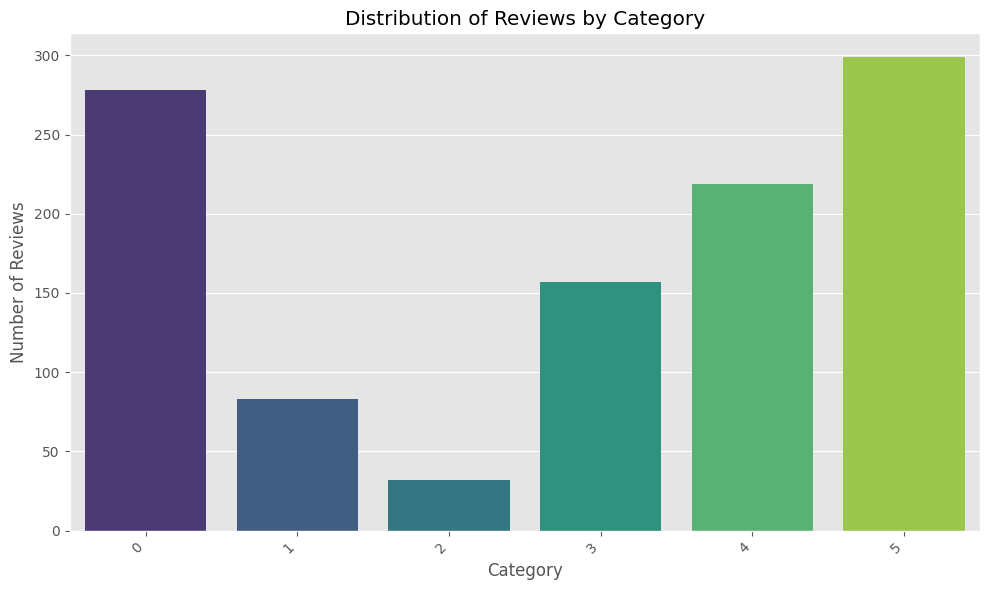

In [8]:
category_counts = df['Sentiment'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')

plt.xlabel('Category')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Reviews by Category')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

In [9]:
def clean_tweet(tweet):
    tweet = re.sub(r'@\w+', '', tweet)
    tweet = re.sub(r'http\S+|www\S+', '', tweet)
    tweet = re.sub(r'#\w+', '', tweet)
    tweet = tweet.strip()
    return tweet

In [10]:
df['SentimentText'] = df['SentimentText'].str.lower().apply(clean_tweet)
df['SentimentText'][50]

'below stated train waste almost one and half hour on platform please try to fix up less time!!! help'

In [11]:
pd.set_option('display.max_colwidth', None)
df[df['Sentiment']==3]['SentimentText']

9                                                      still vendors are selling local local products like water etc. inside the train
16                              sir, ?? ?????? ????? ?????? ?? ?????????? ?? 6 ?? water point ???? ???? ??? ?? ??? ???  ?????? ??????.
25                             paschim express, vendor doesn't give food mentioned in the menu, so ppl have no option 2 food of choice
47                                   rpf at some serious eating business. pantry is for them not for passengers. shri shakti exp today
51                                                       irctc canteen in mysore selling water 5rs more than mrp. just bought for 20/-
                                                                     ...                                                              
1346             pnr-2119051082trn:12910dt:08-06-2016p1-j4,29name: praveen i boarding  from nzm to brc  no food service was provided..
1350                                                   

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [13]:
from nltk.corpus import stopwords

sw_list = stopwords.words('english')
X = df['SentimentText'].apply(lambda x: [item for item in x.split() if item not in sw_list]).apply(lambda x:" ".join(x))
y = df['Sentiment']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [15]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=2000, stop_words='english')),
    ('logreg', LogisticRegression(max_iter=1000))
])

In [16]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_features=2000, stop_words='english')),
                ('logreg', LogisticRegression(max_iter=1000))])

In [17]:
y_pred = pipeline.predict(X_test)

In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 82.24%


In [19]:
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[52  0  0  0  2  2]
 [ 2  6  0  1  4  4]
 [ 0  0  1  0  1  4]
 [ 7  1  0 24  1  1]
 [ 3  0  0  0 33  3]
 [ 2  0  0  0  0 60]]


In [20]:
label_mapping = {
    0: 'Cleanliness',
    1: 'Others',
    2: 'Medical issues',
    3: 'Food Services',
    4: 'Train Delay',
    5: 'Ticket issues',
}
df['category'] = df['Sentiment'].map(label_mapping)
df = df.drop('Sentiment', axis=1)

In [21]:
df.shape

(1068, 3)

In [22]:
example = df['SentimentText'][50]
example

'below stated train waste almost one and half hour on platform please try to fix up less time!!! help'

In [23]:
tokens = nltk.word_tokenize(example)
tokens

['below',
 'stated',
 'train',
 'waste',
 'almost',
 'one',
 'and',
 'half',
 'hour',
 'on',
 'platform',
 'please',
 'try',
 'to',
 'fix',
 'up',
 'less',
 'time',
 '!',
 '!',
 '!',
 'help']

In [24]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('below', 'IN'),
 ('stated', 'VBN'),
 ('train', 'NN'),
 ('waste', 'NN'),
 ('almost', 'RB'),
 ('one', 'CD'),
 ('and', 'CC'),
 ('half', 'VB'),
 ('hour', 'NN'),
 ('on', 'IN')]

In [25]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  below/IN
  stated/VBN
  train/NN
  waste/NN
  almost/RB
  one/CD
  and/CC
  half/VB
  hour/NN
  on/IN
  platform/NN
  please/NN
  try/VB
  to/TO
  fix/VB
  up/RP
  less/JJR
  time/NN
  !/.
  !/.
  !/.
  help/NN)


In [26]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
sia = SentimentIntensityAnalyzer()
sia

In [27]:
sia.polarity_scores(example)

{'neg': 0.115, 'neu': 0.656, 'pos': 0.229, 'compound': 0.421}

In [28]:
res = {}
for i, row in tqdm(df.iterrows(), total = len(df)):
    text = row['SentimentText']
    myid = row['Item ID']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/1068 [00:00<?, ?it/s]

In [29]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index':'Item ID'})
vaders = vaders.merge(df, how='left')

In [30]:
vaders['max_sentiment'] = vaders[['neg','neu','pos']].idxmax(axis=1)

vaders_one_hot = pd.get_dummies(vaders['max_sentiment'])

vaders = vaders.drop(['neg','neu','pos'], axis=1)

df_vaders_one_hot = pd.concat([vaders, vaders_one_hot], axis=1)

df_vaders_one_hot = df_vaders_one_hot.drop('max_sentiment', axis=1)

df_vaders_one_hot

,Item ID,compound,SentimentText,category,neg,neu,pos
0,1,-0.4767,"my pnr is 8348062961, i am in way but there is no water in toilet and mess is everywhere in coach. please provide basic facil.",Cleanliness,False,True,False
1,2,-0.2235,ac not working in prayag lucknow intercity today which departed from prayag at 3.45 pm..staff not helping us,Cleanliness,False,True,False
2,3,0.0000,i'm traveling to chennai by train 16102 coach s4-46. my berth is very dirty(some one vomitted on the birth).,Cleanliness,False,True,False
3,4,0.0000,irctc is not responding at the time of tatkal booking.,Ticket issues,False,True,False
4,7,-0.2263,wrkout smthng tht cn hlp trains to run on right time.malwa exprs delayed more than 3 hrs @ mathura junction,Train Delay,False,True,False
...,...,...,...,...,...,...,...
1063,1361,0.1027,train no 12601 maangalore mail- general passengers in reserved compartment s11. difficult to reach bathroom. please help,Cleanliness,False,True,False
1064,1362,-0.0516,an aged lady has been alloted upper berth in train no. 22911. pnr no. 8553362063. kindly see if any modifications possible.,Ticket issues,False,True,False
1065,1363,-0.1531,"aggressive copassengers, need of immediate change of seat pnr 4512791357",Others,False,True,False
1066,1364,-0.6808,"no water in coach...please do something...train no. 12550,coach no. b4,jammutawi durg exp.,,,,next station is agra..",Cleanliness,False,True,False


<Figure size 1200x800 with 0 Axes>

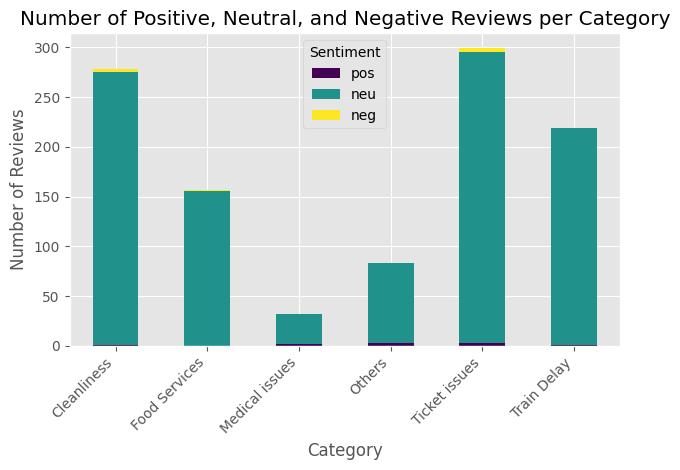

In [31]:
vaders_sentiment_counts = df_vaders_one_hot.groupby('category')[['pos', 'neu', 'neg']].sum()

# Plot the distribution using a bar plot
plt.figure(figsize=(12, 8))
vaders_sentiment_counts.plot(kind='bar', stacked=True, colormap='viridis')

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Number of Reviews')
plt.title('Number of Positive, Neutral, and Negative Reviews per Category')
plt.xticks(rotation=45, ha='right')  # Rotate x labels for better readability
plt.legend(title='Sentiment')
plt.tight_layout()

# Show the plot
plt.show()

In [32]:
df_vaders_one_hot.head()

,Item ID,compound,SentimentText,category,neg,neu,pos
0,1,-0.4767,"my pnr is 8348062961, i am in way but there is no water in toilet and mess is everywhere in coach. please provide basic facil.",Cleanliness,False,True,False
1,2,-0.2235,ac not working in prayag lucknow intercity today which departed from prayag at 3.45 pm..staff not helping us,Cleanliness,False,True,False
2,3,0.0000,i'm traveling to chennai by train 16102 coach s4-46. my berth is very dirty(some one vomitted on the birth).,Cleanliness,False,True,False
3,4,0.0000,irctc is not responding at the time of tatkal booking.,Ticket issues,False,True,False
4,7,-0.2263,wrkout smthng tht cn hlp trains to run on right time.malwa exprs delayed more than 3 hrs @ mathura junction,Train Delay,False,True,False


In [33]:
df_vaders_one_hot['SentimentText'][2]

"i'm traveling to chennai by train 16102 coach s4-46. my berth is very dirty(some one vomitted on the birth)."

In [34]:
df_vaders_one_hot.sort_values('pos', ascending=False)

,Item ID,compound,SentimentText,category,neg,neu,pos
261,336,0.3182,please take n/a.,Ticket issues,False,False,True
195,250,0.3182,"please share train no, and coach position.",Train Delay,False,False,True
695,880,0.4939,kindly look into this,Others,False,False,True
443,568,0.8625,can't we increase security check in railway stations just like metro stations. feeling safe is best comfort.,Others,False,False,True
362,458,0.6486,please help. his pnr number is 2820176609,Medical issues,False,False,True
...,...,...,...,...,...,...,...
365,461,0.4118,"dear sir, u took a good initiative of wateratm but the machine is dispensing 900ml water on the price of 1ltr",Food Services,False,True,False
366,462,0.0000,"sir,please hlp my sis travlng vid 9months baby+2kid intrain12479lost her reticule-she is vry depressd-pnr-2419055140,pls asist",Others,False,True,False
367,463,-0.5267,"sir, missing girl could not be traced. pl lodge missing report with grp/siliguri",Others,False,True,False
368,465,-0.5209,the first class coupes in the ranchi- hatia express are very old and poor air conditioning they should be replac,Cleanliness,False,True,False


In [35]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [36]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

C:\Users\KHAN T C\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [37]:
encoded_text = tokenizer(example, return_tensors = 'pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg': scores[0],
    'roberta_neu': scores[1],
    'roberta_pos': scores[2],
}
scores_dict

{'roberta_neg': 0.62652856,
 'roberta_neu': 0.31618753,
 'roberta_pos': 0.057283834}

In [38]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors = 'pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg': scores[0],
        'roberta_neu': scores[1],
        'roberta_pos': scores[2],
    }
    return scores_dict

In [39]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['SentimentText']
        myid = row['Item ID']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')


  0%|          | 0/1068 [00:00<?, ?it/s]

In [40]:
res[1]

{'vader_neg': 0.202,
 'vader_neu': 0.7,
 'vader_pos': 0.098,
 'vader_compound': -0.4767,
 'roberta_neg': 0.87432,
 'roberta_neu': 0.11612762,
 'roberta_pos': 0.009552363}

In [41]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Item ID'})
results_df = results_df.merge(df, how='left')

In [42]:
results_df.head()

,Item ID,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,SentimentText,category
0,1,0.202,0.700,0.098,-0.4767,0.874320,0.116128,0.009552,"my pnr is 8348062961, i am in way but there is no water in toilet and mess is everywhere in coach. please provide basic facil.",Cleanliness
1,2,0.100,0.900,0.000,-0.2235,0.879616,0.113440,0.006944,ac not working in prayag lucknow intercity today which departed from prayag at 3.45 pm..staff not helping us,Cleanliness
2,3,0.000,1.000,0.000,0.0000,0.943851,0.051336,0.004813,i'm traveling to chennai by train 16102 coach s4-46. my berth is very dirty(some one vomitted on the birth).,Cleanliness
3,4,0.000,1.000,0.000,0.0000,0.620869,0.368228,0.010902,irctc is not responding at the time of tatkal booking.,Ticket issues
4,7,0.101,0.899,0.000,-0.2263,0.336837,0.619477,0.043686,wrkout smthng tht cn hlp trains to run on right time.malwa exprs delayed more than 3 hrs @ mathura junction,Train Delay


<Figure size 1200x800 with 0 Axes>

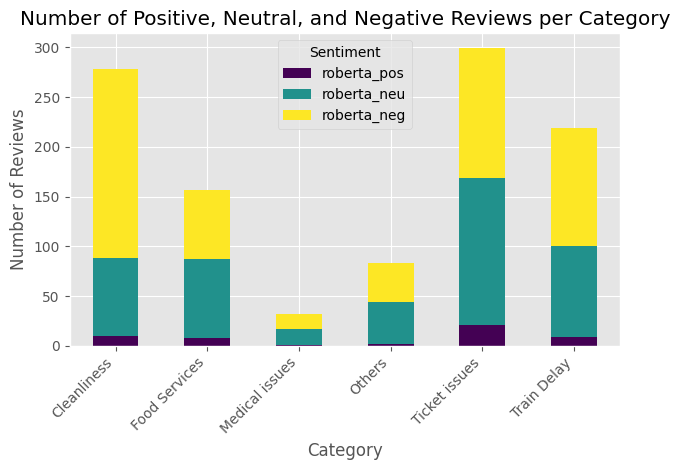

In [43]:
roberta_sentiment_counts = results_df.groupby('category')[['roberta_pos', 'roberta_neu', 'roberta_neg']].sum()

# Plot the distribution using a bar plot
plt.figure(figsize=(12, 8))
roberta_sentiment_counts.plot(kind='bar', stacked=True, colormap='viridis')

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Number of Reviews')
plt.title('Number of Positive, Neutral, and Negative Reviews per Category')
plt.xticks(rotation=45, ha='right')  # Rotate x labels for better readability
plt.legend(title='Sentiment')
plt.tight_layout()

# Show the plot
plt.show()

In [44]:
results_df.sort_values('roberta_pos', ascending=False)['SentimentText']

155                                                                           thank u so much sir...my money has been refunded
132                                                    so this is what india railways looks like. can't get any better !!   ¦
846                                                                                 thanks for the reply ..:). pnr-4138201979.
940                                                                               pnr is 2544989573. many thanks beforehand !!
244    traveled 3 stations in last few days. never seen stations so clean and hygienic. coaches &amp; toilets absolutely clean
                                                                ...                                                           
784                       sir my train no. 12186 coach no. is s2,6 is and my seat is near toilet and its very dirty and nasty.
701       the condition inside 13072's general bogey is worst than animals.people are forced to sleep at doors.

In [45]:
results_df.sort_values('vader_pos', ascending=False)['SentimentText']

362                                                                                       please help. his pnr number is 2820176609
237                                                                                       please help. his pnr number is 2820176609
261                                                                                                                please take n/a.
476                                                                                                     irctc  emergency, plz. help
695                                                                                                           kindly look into this
                                                                   ...                                                             
457     rt : 2 hours journey completed in 6 hrs excluding waiting time 3-5hrs.u should take responsibility mostly trains late 5tâ¦
459                                                                    impos

In [46]:
results_df.sort_values('roberta_neg', ascending=False)['SentimentText']

299                                                                     food quality is very bad and behaviour of vender is very rude
464                                                       irctc is a shit... failed booking tickets many times and no refund of money
213    it's really bad service for rac under 3rd ac category.... really a bad experience.. no pillow,no bed sheet n really rude staff
747                     no food no water tckt charged filthy bt suvida is worst than a summer spl dis service is pethetic train 05514
657                           train 12015. how does irctc serve pathetic veg cutlet full of breadcrumbs in &amp; out. no taste at all
                                                                    ...                                                              
244           traveled 3 stations in last few days. never seen stations so clean and hygienic. coaches &amp; toilets absolutely clean
516                                                     this i

In [47]:
results_df.sort_values('vader_neg', ascending=False)['SentimentText']

345                                                                             19259  no water in s6. stinking, sad plight.10jun
199                                                                                               no ticket checkers are bothered
91                                                                                                             pnr no. 6107451949
173                                                                                                            pnr no -2720271036
605                     sirohi rajasthan railway counter hacked by unauthorized agent. poor public facing problem. no governance.
                                                                  ...                                                            
606    wish the food had not been unpalatable &amp; unhygienic, toilets so unclean. 12006, 9-6-16, c6. train travel is an ordeal!
608                 irctc website was better in lalu's time for common man. plz allocate s

In [48]:
results_df['max_sentiment'] = results_df[['roberta_neg', 'roberta_neu', 'roberta_pos']].idxmax(axis=1)
one_hot = pd.get_dummies(results_df['max_sentiment'])

<Figure size 800x600 with 0 Axes>

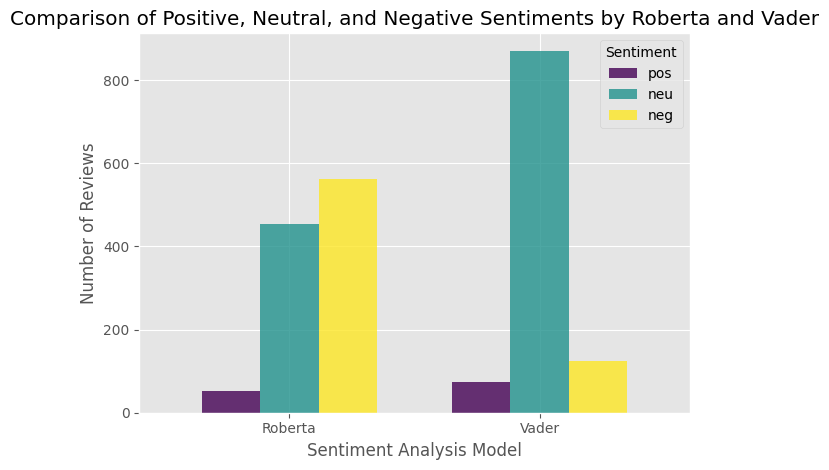

In [49]:
overall_sentiment_counts = {
    'Roberta': {
        'pos': results_df['roberta_pos'].sum(),
        'neu': results_df['roberta_neu'].sum(),
        'neg': results_df['roberta_neg'].sum()
    },
    'Vader': {
        'pos': results_df['vader_pos'].sum(),
        'neu': results_df['vader_neu'].sum(),
        'neg': results_df['vader_neg'].sum()
    }
}

overall_sentiment_df = pd.DataFrame(overall_sentiment_counts)

overall_sentiment_df = overall_sentiment_df.T

plt.figure(figsize=(8, 6))
overall_sentiment_df.plot(kind='bar', colormap='viridis', alpha=0.8, width=0.7)

# Add labels and title
plt.title('Comparison of Positive, Neutral, and Negative Sentiments by Roberta and Vader')
plt.xlabel('Sentiment Analysis Model')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)  # Keep model names horizontal
plt.legend(title='Sentiment', loc='upper right')
plt.tight_layout()

# Show the plot
plt.show()

In [50]:
results_df = results_df.drop(['roberta_neg','roberta_neu','roberta_pos', 'vader_neg','vader_neu', 'vader_pos', 'vader_compound'], axis=1)

In [51]:
df_one_hot = pd.concat([results_df, one_hot], axis=1)

df_one_hot = df_one_hot.drop('max_sentiment', axis=1)

df_one_hot

,Item ID,SentimentText,category,roberta_neg,roberta_neu,roberta_pos
0,1,"my pnr is 8348062961, i am in way but there is no water in toilet and mess is everywhere in coach. please provide basic facil.",Cleanliness,True,False,False
1,2,ac not working in prayag lucknow intercity today which departed from prayag at 3.45 pm..staff not helping us,Cleanliness,True,False,False
2,3,i'm traveling to chennai by train 16102 coach s4-46. my berth is very dirty(some one vomitted on the birth).,Cleanliness,True,False,False
3,4,irctc is not responding at the time of tatkal booking.,Ticket issues,True,False,False
4,7,wrkout smthng tht cn hlp trains to run on right time.malwa exprs delayed more than 3 hrs @ mathura junction,Train Delay,False,True,False
...,...,...,...,...,...,...
1063,1361,train no 12601 maangalore mail- general passengers in reserved compartment s11. difficult to reach bathroom. please help,Cleanliness,True,False,False
1064,1362,an aged lady has been alloted upper berth in train no. 22911. pnr no. 8553362063. kindly see if any modifications possible.,Ticket issues,False,True,False
1065,1363,"aggressive copassengers, need of immediate change of seat pnr 4512791357",Others,False,True,False
1066,1364,"no water in coach...please do something...train no. 12550,coach no. b4,jammutawi durg exp.,,,,next station is agra..",Cleanliness,True,False,False


In [52]:
df_one_hot['SentimentText'][6]

'still vendors are selling local local products like water etc. inside the train'

In [53]:
# import pickle

In [54]:
# with open('sentiment_analysis_model.pkl', 'wb') as file:
#     pickle.dump(pipeline, file)

In [55]:
# with open('tokenizer.pkl', 'wb') as file:
#     pickle.dump(tokenizer, file)

In [56]:
# model.save_pretrained('roberta_model')